In [1]:
import numpy as np
from datetime import datetime

# Pandas Base 05
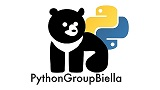

In [2]:
# Permette prints multipli in una sola cella
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd

In [3]:
index = pd.date_range('1/1/2000', periods=8)
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])
df

a    0.102489
b   -0.369660
c   -0.844719
d    1.093100
e   -0.724574
dtype: float64

,A,B,C
2000-01-01,0.681569,-1.508270,1.042818
2000-01-02,0.133797,0.465557,-0.050459
2000-01-03,-0.967771,-0.727757,0.372409
2000-01-04,0.894948,1.141851,2.280891
2000-01-05,-0.051361,0.328035,0.117565
2000-01-06,-0.762938,0.867563,-0.692363
2000-01-07,0.850550,-0.321017,0.296615
2000-01-08,0.988343,0.594428,1.566187


In [4]:
df2 = pd.DataFrame(np.random.randn(8, 3),columns=['A', 'B', 'C'])
#Creo nuova colonna con la serie index
df2["date"] = index

df2

,A,B,C,date
0,-0.918160,0.889683,-0.663248,2000-01-01
1,-1.100643,0.052551,-0.260009,2000-01-02
2,0.564485,1.108896,1.046508,2000-01-03
3,-0.080988,-0.166951,0.220773,2000-01-04
4,1.199684,-0.461698,0.349211,2000-01-05
5,-1.146930,-0.441403,-1.284175,2000-01-06
6,1.305557,1.161621,-0.489256,2000-01-07
7,0.269337,-0.048438,-0.825023,2000-01-08


## Indexing

### .iloc

In [5]:
# selezione su colonne
df.iloc[:,1]
type(df.iloc[:,1])

2000-01-01   -1.508270
2000-01-02    0.465557
2000-01-03   -0.727757
2000-01-04    1.141851
2000-01-05    0.328035
2000-01-06    0.867563
2000-01-07   -0.321017
2000-01-08    0.594428
Freq: D, Name: B, dtype: float64

pandas.core.series.Series

In [6]:
# selezione su colonne
df.iloc[:,[1]]
type(df.iloc[:,[1]])

,B
2000-01-01,-1.508270
2000-01-02,0.465557
2000-01-03,-0.727757
2000-01-04,1.141851
2000-01-05,0.328035
2000-01-06,0.867563
2000-01-07,-0.321017
2000-01-08,0.594428


pandas.core.frame.DataFrame

In [7]:
# selezione su righe
df.iloc[[0,2],:]

,A,B,C
2000-01-01,0.681569,-1.508270,1.042818
2000-01-03,-0.967771,-0.727757,0.372409


In [8]:
# selezione su righe e colonne
df.iloc[[0,2,4],[0,1]]

,A,B
2000-01-01,0.681569,-1.508270
2000-01-03,-0.967771,-0.727757
2000-01-05,-0.051361,0.328035


In [9]:
# Slicing: ultimi 2 elementi
df.iloc[-2:,[0,1]]

,A,B
2000-01-07,0.850550,-0.321017
2000-01-08,0.988343,0.594428


### .loc

In [10]:
# selezione su colonne
df.loc[:,"A"]

2000-01-01    0.681569
2000-01-02    0.133797
2000-01-03   -0.967771
2000-01-04    0.894948
2000-01-05   -0.051361
2000-01-06   -0.762938
2000-01-07    0.850550
2000-01-08    0.988343
Freq: D, Name: A, dtype: float64

In [11]:
# selezione su colonne
df.loc[:,["A"]]

,A
2000-01-01,0.681569
2000-01-02,0.133797
2000-01-03,-0.967771
2000-01-04,0.894948
2000-01-05,-0.051361
2000-01-06,-0.762938
2000-01-07,0.850550
2000-01-08,0.988343


In [12]:
# selezione su righe e colonne
df.loc[[datetime(2000,1,3)], ["A", "C"]]

,A,C
2000-01-03,-0.967771,0.372409


### [ ] 

magic method \__getitem\__ (is used to implement calls like self[key])

In [13]:
df["A"] # df.loc[:,"A"]

2000-01-01    0.681569
2000-01-02    0.133797
2000-01-03   -0.967771
2000-01-04    0.894948
2000-01-05   -0.051361
2000-01-06   -0.762938
2000-01-07    0.850550
2000-01-08    0.988343
Freq: D, Name: A, dtype: float64

In [14]:
df[["A"]] # df.loc[:,["A"]]

,A
2000-01-01,0.681569
2000-01-02,0.133797
2000-01-03,-0.967771
2000-01-04,0.894948
2000-01-05,-0.051361
2000-01-06,-0.762938
2000-01-07,0.850550
2000-01-08,0.988343


In [15]:
df[["A", "B"]] #Seleziona solo per colonna

,A,B
2000-01-01,0.681569,-1.508270
2000-01-02,0.133797,0.465557
2000-01-03,-0.967771,-0.727757
2000-01-04,0.894948,1.141851
2000-01-05,-0.051361,0.328035
2000-01-06,-0.762938,0.867563
2000-01-07,0.850550,-0.321017
2000-01-08,0.988343,0.594428


### Indexing con array di valori booleani

#### .iloc

In [16]:
filter_ar = [True, False] * 4

In [17]:
filter_ar

[True, False, True, False, True, False, True, False]

In [18]:
df.shape

(8, 3)

In [19]:
df

,A,B,C
2000-01-01,0.681569,-1.508270,1.042818
2000-01-02,0.133797,0.465557,-0.050459
2000-01-03,-0.967771,-0.727757,0.372409
2000-01-04,0.894948,1.141851,2.280891
2000-01-05,-0.051361,0.328035,0.117565
2000-01-06,-0.762938,0.867563,-0.692363
2000-01-07,0.850550,-0.321017,0.296615
2000-01-08,0.988343,0.594428,1.566187


In [20]:
# filtro su righe con valori booleani
df.iloc[filter_ar, :]

,A,B,C
2000-01-01,0.681569,-1.508270,1.042818
2000-01-03,-0.967771,-0.727757,0.372409
2000-01-05,-0.051361,0.328035,0.117565
2000-01-07,0.850550,-0.321017,0.296615


In [21]:
# filtro su colonne con valori booleani
df.iloc[:, [True, False, True]]

,A,C
2000-01-01,0.681569,1.042818
2000-01-02,0.133797,-0.050459
2000-01-03,-0.967771,0.372409
2000-01-04,0.894948,2.280891
2000-01-05,-0.051361,0.117565
2000-01-06,-0.762938,-0.692363
2000-01-07,0.850550,0.296615
2000-01-08,0.988343,1.566187


#### .loc

In [22]:
# filtro su righe con valori booleani
df.loc[filter_ar, :]

,A,B,C
2000-01-01,0.681569,-1.508270,1.042818
2000-01-03,-0.967771,-0.727757,0.372409
2000-01-05,-0.051361,0.328035,0.117565
2000-01-07,0.850550,-0.321017,0.296615


#### [ ]

In [23]:
# filtro su righe con valori booleani
df[filter_ar]

,A,B,C
2000-01-01,0.681569,-1.508270,1.042818
2000-01-03,-0.967771,-0.727757,0.372409
2000-01-05,-0.051361,0.328035,0.117565
2000-01-07,0.850550,-0.321017,0.296615


In [24]:
# filtro su righe con slicing
df[datetime(2000,1,3):datetime(2000,1,5)]

,A,B,C
2000-01-03,-0.967771,-0.727757,0.372409
2000-01-04,0.894948,1.141851,2.280891
2000-01-05,-0.051361,0.328035,0.117565


## Condizioni di filtro

### Una condizione di filtro

In [25]:
# una condizione di filtro
df["A"] > 0.1

2000-01-01     True
2000-01-02     True
2000-01-03    False
2000-01-04     True
2000-01-05    False
2000-01-06    False
2000-01-07     True
2000-01-08     True
Freq: D, Name: A, dtype: bool

### [ ] 

In [26]:
# applico condizione con [ ] per filtrare righe e poi scelgo quali colonne selezionare

# SELECT A, C 
# FROM df 
# WHERE A > 0.1

df[df["A"] > 0.1][["A", "C"]]

,A,C
2000-01-01,0.681569,1.042818
2000-01-02,0.133797,-0.050459
2000-01-04,0.894948,2.280891
2000-01-07,0.850550,0.296615
2000-01-08,0.988343,1.566187


In [27]:
# applico condizione complessa con [ ] per filtrare righe e poi scelgo quali colonne selezionare

# SELECT A, B, C 
# FROM df 
# WHERE A > 0.1 
#   AND B < 100

df[
    (df["A"] > 0.1)
    & (df["B"] < 100)
][["A", "B", "C"]]

,A,B,C
2000-01-01,0.681569,-1.508270,1.042818
2000-01-02,0.133797,0.465557,-0.050459
2000-01-04,0.894948,1.141851,2.280891
2000-01-07,0.850550,-0.321017,0.296615
2000-01-08,0.988343,0.594428,1.566187


##### Gli operatori non sono lazy

In [28]:
# step 1
cond1 = df["A"] > 0.1
cond1

2000-01-01     True
2000-01-02     True
2000-01-03    False
2000-01-04     True
2000-01-05    False
2000-01-06    False
2000-01-07     True
2000-01-08     True
Freq: D, Name: A, dtype: bool

In [29]:
# step 2
cond2 = df["B"] < 100
cond2

2000-01-01    True
2000-01-02    True
2000-01-03    True
2000-01-04    True
2000-01-05    True
2000-01-06    True
2000-01-07    True
2000-01-08    True
Freq: D, Name: B, dtype: bool

In [30]:
# step 3
cond_final = cond1 & cond2
cond_final

2000-01-01     True
2000-01-02     True
2000-01-03    False
2000-01-04     True
2000-01-05    False
2000-01-06    False
2000-01-07     True
2000-01-08     True
Freq: D, dtype: bool

In [31]:
# step 4
# applico condizione complessa con [ ] per filtrare righe e poi scelgo quali colonne selezionare

# SELECT A, B, C 
# FROM df 
# WHERE A > 0.1 
#   AND B < 100

df[cond_final][["A", "B", "C"]]

,A,B,C
2000-01-01,0.681569,-1.508270,1.042818
2000-01-02,0.133797,0.465557,-0.050459
2000-01-04,0.894948,1.141851,2.280891
2000-01-07,0.850550,-0.321017,0.296615
2000-01-08,0.988343,0.594428,1.566187


##### funzionano anche su tipi "complessi"

In [32]:
# applico condizione su data con [ ] per filtrare righe e poi scelgo quali colonne selezionare

# SELECT *
# FROM df2
# WHERE DAY(date) == 5

df2[
    df2["date"].dt.day == 5
]

,A,B,C,date
4,1.199684,-0.461698,0.349211,2000-01-05


### .iloc

In [33]:
# applico condizione con .iloc per filtrare righe
df.iloc[(df["A"] > 0.1).tolist(), :]

,A,B,C
2000-01-01,0.681569,-1.508270,1.042818
2000-01-02,0.133797,0.465557,-0.050459
2000-01-04,0.894948,1.141851,2.280891
2000-01-07,0.850550,-0.321017,0.296615
2000-01-08,0.988343,0.594428,1.566187


### .loc

In [34]:
# applico condizione con .loc pe filtrare righe
df.loc[df["A"] > 0.1, :]

,A,B,C
2000-01-01,0.681569,-1.508270,1.042818
2000-01-02,0.133797,0.465557,-0.050459
2000-01-04,0.894948,1.141851,2.280891
2000-01-07,0.850550,-0.321017,0.296615
2000-01-08,0.988343,0.594428,1.566187


In [35]:
df.iloc[3] > 0.1

A    True
B    True
C    True
Name: 2000-01-04 00:00:00, dtype: bool

In [36]:
# applico condizione con .loc per filtrare righe e colonne secondo certe condizioni
df.loc[df["A"] > 0.1, df.iloc[3] > 0.1]

,A,B,C
2000-01-01,0.681569,-1.508270,1.042818
2000-01-02,0.133797,0.465557,-0.050459
2000-01-04,0.894948,1.141851,2.280891
2000-01-07,0.850550,-0.321017,0.296615
2000-01-08,0.988343,0.594428,1.566187
